Given the root of a binary tree, return the leftmost value in the last row of the tree.

Example 2:
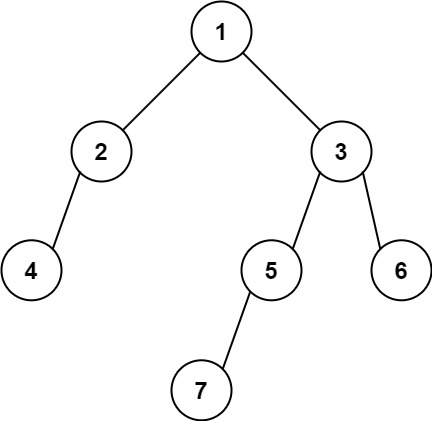

Input: root = [1,2,3,4,null,5,6,null,null,7]
Output: 7

- through function build_tree, we can quickly build a tree same as the example for us to test later

In [20]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def build_tree():
    tree = TreeNode(1)
    n2 = TreeNode(2)
    n3 = TreeNode(3)
    n4 = TreeNode(4)
    n5 = TreeNode(5)
    n6 = TreeNode(6)
    n7 = TreeNode(7)
    
    n5.left = n7
    n3.left = n5
    n3.right = n6
    n2.left = n4
    tree.left = n2
    tree.right = n3
    
    return tree

tree = build_tree()

### DFS
- We want to find the deepest and the most left node value in the tree, in DFS solution, I store depth and values as key value pair in a dictionary, and do DFS from left to right, so in every step, if finding there's already a value in it (in that depth), we won't assign the new value to it, because we do the DFS "FROM LEFT TO RIGHT", so the new value will not be the most left value that we want to find

In [28]:
class Solution:
    def findBottomLeftValue(self, root) -> int:
        val_dict = {}
        val_dict[0] = root.val

        self.find_left(root, depth = 0, val_dict = val_dict)
        
        return val_dict[max(val_dict)]
    
    def find_left(self, node, depth, val_dict):
        if not node.left and not node.right:
            if depth in val_dict.keys():
                return
            else:
                val_dict[depth] = node.val
                return 

        if node.left:
            self.find_left(node.left, depth+1, val_dict)

        if node.right:
            self.find_left(node.right, depth+1, val_dict)

        else:
            return

DFS = Solution()
DFS.findBottomLeftValue(tree)

7

### BFS

- In BFS solution, we go to next depth after we go through all the node in current depth, in each depth, we store the node values from right to left in a list, so after we finish the iteration, last value in the list is the most left and the deepest value that we want to find

In [19]:
class Solution:
    def findBottomLeftValue(self, root) -> int:
        cur = [root]
        ans = [root.val]
        while cur:
            next_ = []
            for node in cur:
                if node.right:
                    ans.append(node.right.val)
                    next_.append(node.right)
                if node.left:
                    ans.append(node.left.val)
                    next_.append(node.left)
            cur = next_
        
        return ans[-1]
    
BFS = Solution()
BFS.findBottomLeftValue(tree)

7